In [1]:
# lets try and fit a linear model using pymc3

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pymc3 as pm
import arviz as az

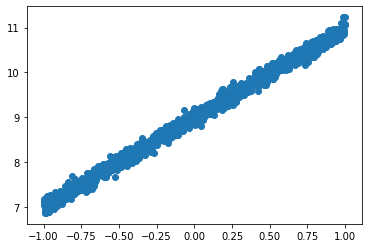

In [3]:
a_true = 2
b_true = 9
noise_true = 0.1
x_data = np.linspace(-1, 1, 1000)

noise = stats.norm(0, noise_true).rvs(size=len(x_data))

y_data = a_true * x_data + b_true + noise

plt.figure()
plt.scatter(x_data, y_data)

In [4]:
with pm.Model() as model:
    a = pm.Uniform('a', -30, 30)
    b = pm.Uniform('b', -30, 30)
    sigma = pm.HalfNormal('sigma', 10)
    
    yhat = x_data * a + b
    y = pm.Normal('y', yhat, sigma, observed=y_data)

In [5]:
model

In [6]:
with model:
    start = pm.find_MAP()

In [7]:
start

{'a_interval__': array(0.13286729),
 'b_interval__': array(0.61889793),
 'sigma_log__': array(-2.31322542),
 'a': array(1.99008251),
 'b': array(8.99807144),
 'sigma': array(0.09894161)}

In [8]:
with model:
#     step = pm.Metropolis()
    step = pm.NUTS()
    trace = pm.sample(10000, step=step, start=start)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b, a]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 22 seconds.


In [9]:
az.plot_trace(trace)

/Users/spx8sk/anaconda3/envs/scrinet-dev/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a21e60c50>,
      dtype=object)